In [1]:
from cont3d import contactmaps
import glob
from polychrom.hdf5_format import HDF5Reporter, list_URIs, load_URI, load_hdf5_file, save_hdf5_file
import polychrom
import numpy as np

In [2]:
# list of conformation URIs
filenames = sum([list_URIs(i) for i in glob.glob("/net/wiz/home/magus/data/Simulations/carolynSimulations/enhancerPaperToyExample/newSweep4_5*")],[])

In [3]:
filenames = filenames[:1000]

In [4]:
# Making a 500x500x500 contactmap with 50-monomer resolution
# using the first 500 * 50 = 25000 monomers of a conformation

N = 500
resolution = 50

In [5]:
def example_contact_finder(data, cutoff=5):
    conts = polychrom.polymer_analyses.calculate_contacts(data[:(N*resolution)], cutoff=cutoff)
    conts = np.unique(conts // resolution, axis=0)
    return conts

In [18]:
data = load_URI(filenames[10])
sample_cont = example_contact_finder(data['pos'])
sample_cont

array([[  0,   0],
       [  0,   1],
       [  0,  10],
       ...,
       [498, 498],
       [498, 499],
       [499, 499]])

In [19]:
# get sparse triplets, i <= j <= k
contactmaps.sparse_triplets_from_contacts(N, sample_cont)

array([[  0,   0,   0],
       [  0,   0,   1],
       [  0,   0,  10],
       ...,
       [498, 498, 499],
       [498, 499, 499],
       [499, 499, 499]])

In [22]:
# dense triplets, arr[i][j][k] is filled if there is a triplet between i <= j <= k
contactmaps.dense_triplets_from_contacts(N, sample_cont)

array([[[1., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0.

In [7]:
hmap = contactmaps.triplet_map(N, filenames, n_threads=20, contact_finder=example_contact_finder)

In [8]:
import matplotlib.pyplot as plt

/home/neil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


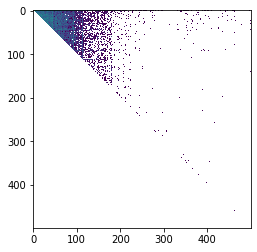

In [9]:
plt.figure()
plt.imshow(np.log10(hmap[0]))